In [1]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

# Explore directory structure
for root, dirs, files in os.walk(path):
    print(root)

/kaggle/input/the-wildfire-dataset
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/nofire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val/fire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire
/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/fire


In [2]:
#Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [3]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
if len(physical_device) > 0:
  tf.config.experimental.set_memory_growth(physical_device[0], True)
  print("GPU is Used")
else:
  print("GPU is not available")

GPU is not available


In [4]:
train_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train"
val_dir = "/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val"
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [5]:
classes = os.listdir(train_dir)
num_classes = len(classes)
print(f'Number of classes: {num_classes}')
print(f'Classes: {classes}')

Number of classes: 2
Classes: ['nofire', 'fire']


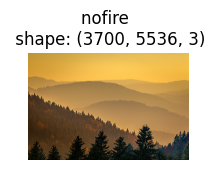

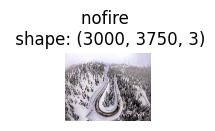

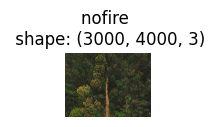

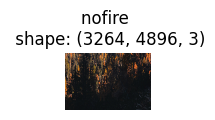

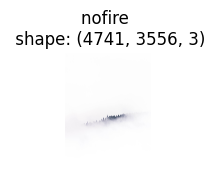

In [6]:
#let visualize
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
  plt.show()

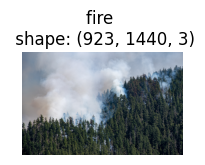

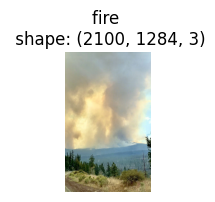

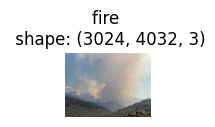

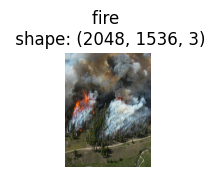

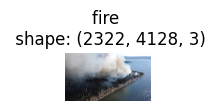

In [7]:
#let visualize
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)
  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
  plt.show()

In [8]:
img_width, img_height = 150, 150
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)
test_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 1887 images belonging to 2 classes.


In [9]:
class_mapping = train_generator.class_indices
class_name = list(class_mapping.keys())
print("Class Name:", class_name)


Class Name: ['fire', 'nofire']


In [10]:
model = Sequential([
    Input(shape= (img_width, img_height, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size= (2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)

In [11]:
model.compile(optimizer='adam',
             loss= 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_steps = val_generator.samples  // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
41/58 ━━━━━━━━━━━━━━━━━━━━ 3:17 12s/step - accuracy: 0.5979 - loss: 0.9434

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


46/58 ━━━━━━━━━━━━━━━━━━━━ 2:19 12s/step - accuracy: 0.6041 - loss: 0.9161

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 679s 12s/step - accuracy: 0.6157 - loss: 0.8639
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 524us/step - accuracy: 0.7500 - loss: 0.5818
Epoch 3/12


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 708s 11s/step - accuracy: 0.7298 - loss: 0.5267
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 304us/step - accuracy: 0.7188 - loss: 0.4419
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 688s 11s/step - accuracy: 0.7605 - loss: 0.4803
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.7500 - loss: 0.4111  
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 667s 11s/step - accuracy: 0.8018 - loss: 0.4295
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 345us/step - accuracy: 0.8125 - loss: 0.4839
Epoch 9/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 696s 12s/step - accuracy: 0.7880 - loss: 0.4602
Epoch 10/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 415us/step - accuracy: 0.8750 - loss: 0.3155
Epoch 11/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 727s 12s/step - accuracy: 0.7982 - loss: 0.4332
Epoch 12/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 342us/step - accuracy: 0.8125 - loss: 0.4563


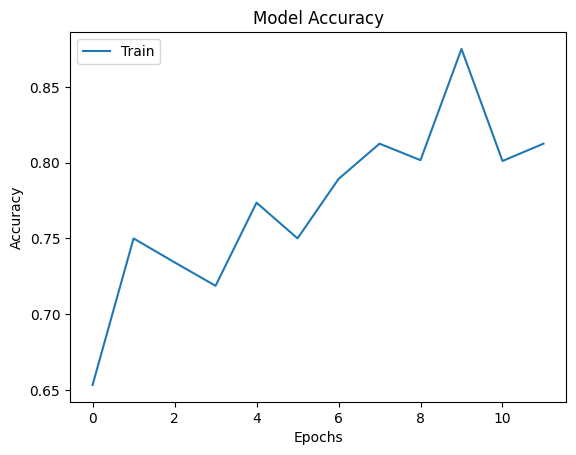

In [13]:
plt.plot(history.history['accuracy'])
# Use 'val_accuracy' only if validation data was passed during model training
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

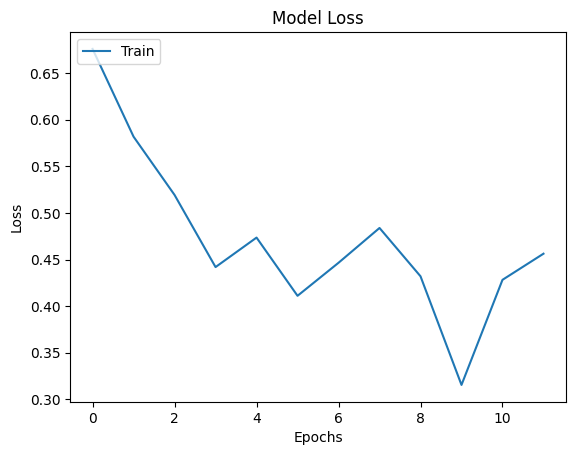

In [14]:
plt.plot(history.history['loss'])
# Use 'val_loss' only if validation data was passed during model training
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy =  model.evaluate(test_generator, steps = test_generator.samples //batch_size)
print(f'Test Accuracy: {test_accuracy:.4f}')

 4/58 ━━━━━━━━━━━━━━━━━━━━ 10:31 12s/step - accuracy: 0.8223 - loss: 0.3884

In [ ]:
model.save('FFD.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model = load_model('FFD.keras')
def predict_fire(img_path):
  img = image.load_img(img_path, target_size =(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array /= 255.0
  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    prediction_class = class_name[1]
  else:
    prediction_class = class_name[0]
  plt.imshow(img)
  plt.title(f'Predicted: {prediction_class}')
  plt.axis('off')
  plt.show()

In [19]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire')


['maciek-sulkowski-oCmOCNGJM1g-unsplash.jpg',
 'bobby-stevenson-Bi8vaFCoaNM-unsplash.jpg',
 'ozark-drones-H1psDNcpOfI-unsplash.jpg',
 'cristina-gottardi-ahzgaalmLYY-unsplash.jpg',
 'mads-schmidt-rasmussen-6YmzwamGzCg-unsplash.jpg',
 'harald-pliessnig-fI_UmufdnX4-unsplash.jpg',
 'matt-palmer-P2zKezpWLwY-unsplash.jpg',
 'jim-niakaris-4BIQP4swrSE-unsplash.jpg',
 'eberhard-grossgasteiger-RVj002xHssw-unsplash.jpg',
 'johny-goerend-pK8Wj_wZVkw-unsplash.jpg',
 'nic-y-c-vNBg-a6eRtc-unsplash.jpg',
 'olena-sergienko-0Ws_-v4Y_wY-unsplash.jpg',
 '35581717623_efaaaf5821_o.jpg',
 '36321782572_3aa9b4fc64_o.jpg',
 'marek-piwnicki-WElEec96cxk-unsplash.jpg',
 'aaron-burden-qqH0Clj6OFE-unsplash.jpg',
 'matthew-6abeLGdk-jo-unsplash.jpg',
 'benjamin-voros-t-3f5RS-JGI-unsplash.jpg',
 '23905687626_75ac1e721d_o.jpg',
 'kristaps-ungurs-UIOmH4F3Wtk-unsplash.jpg',
 'kym-mackinnon-ohRlkFvO5e8-unsplash.jpg',
 '39728610281_68e77869f2_o.jpg',
 'kevin-fitzgerald-8ji8O5uHE1U-unsplash.jpg',
 'luke-baard-DdNyljNFYX4-uns

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


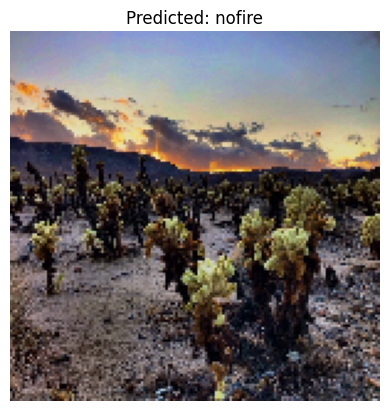

In [20]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/50010867961_903b6432f7_o.jpg')